# **INF161 Project** - Bike traffic predictions

#### *A model to predict how many people cycle over Nygårdsbroen at a given time.* 

## **Part 2** - Modelling and prediction

In this part of the project I will do modelling and prediction. 

First, I implement necessary packages that I may want to use. 

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.feature_selection import SelectKBest, f_regression
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor 

First, I read in the two data files and printed the clean data to have a look on it.

In [46]:
clean_data = pd.read_csv("clean_data.csv")
weather_traffic_2022 = pd.read_csv("weather_traffic_2022.csv")

In [47]:
clean_data

,Datetime,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke,Volum,Season,Weekdays,Weekends
0,2015-07-16 16:00:00,432.833333,48.7,13.733333,4.333333,107.0,2,3,0
1,2015-07-16 17:00:00,378.400000,60.0,13.866667,3.933333,84.0,2,3,0
2,2015-07-16 18:00:00,212.583333,60.0,13.216667,4.233333,57.0,2,3,0
3,2015-07-16 19:00:00,79.750000,60.0,12.683333,2.950000,49.0,2,3,0
4,2015-07-16 20:00:00,10.633333,36.0,12.066667,2.483333,45.0,2,3,0
...,...,...,...,...,...,...,...,...,...
56381,2021-12-31 18:00:00,-0.100000,0.0,6.483333,0.466667,5.0,0,4,0
56382,2021-12-31 19:00:00,-0.266667,0.0,5.616667,2.650000,4.0,0,4,0
56383,2021-12-31 20:00:00,-0.550000,0.0,4.700000,1.916667,2.0,0,4,0
56384,2021-12-31 21:00:00,-1.400000,0.0,4.233333,1.733333,5.0,0,4,0


Then I made a function to change the datetime column. I split it into to four separate columns, year, month, day and hour. 

In [48]:
def separateDatetime(data):
    data["Year"] = data["Datetime"].astype(str)

    data["Datetime"] = pd.to_datetime(data["Datetime"])

    date1 = data["Year"].str.split("-", n=4, expand=True)
    data["Year"] = date1[0]
    data["Month"] = date1[1]
    data["Day"] = date1[2]

    date2 = data["Day"].str.split(" ", n=4, expand=True)
    data["Day"] = date2[0]
    data["Hour"] = date2[1]

    date3 = data["Hour"].str.split(":", n=4, expand=True)
    data["Hour"] = date3[0]

separateDatetime(clean_data)
clean_data

,Datetime,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke,Volum,Season,Weekdays,Weekends,Year,Month,Day,Hour
0,2015-07-16 16:00:00,432.833333,48.7,13.733333,4.333333,107.0,2,3,0,2015,07,16,16
1,2015-07-16 17:00:00,378.400000,60.0,13.866667,3.933333,84.0,2,3,0,2015,07,16,17
2,2015-07-16 18:00:00,212.583333,60.0,13.216667,4.233333,57.0,2,3,0,2015,07,16,18
3,2015-07-16 19:00:00,79.750000,60.0,12.683333,2.950000,49.0,2,3,0,2015,07,16,19
4,2015-07-16 20:00:00,10.633333,36.0,12.066667,2.483333,45.0,2,3,0,2015,07,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56381,2021-12-31 18:00:00,-0.100000,0.0,6.483333,0.466667,5.0,0,4,0,2021,12,31,18
56382,2021-12-31 19:00:00,-0.266667,0.0,5.616667,2.650000,4.0,0,4,0,2021,12,31,19
56383,2021-12-31 20:00:00,-0.550000,0.0,4.700000,1.916667,2.0,0,4,0,2021,12,31,20
56384,2021-12-31 21:00:00,-1.400000,0.0,4.233333,1.733333,5.0,0,4,0,2021,12,31,21


Then I dropped the "Datetime" before splitting the data in to training, validation and test data.

In [49]:
clean_data.drop(["Datetime"], axis=1, inplace=True)
clean_data

,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke,Volum,Season,Weekdays,Weekends,Year,Month,Day,Hour
0,432.833333,48.7,13.733333,4.333333,107.0,2,3,0,2015,07,16,16
1,378.400000,60.0,13.866667,3.933333,84.0,2,3,0,2015,07,16,17
2,212.583333,60.0,13.216667,4.233333,57.0,2,3,0,2015,07,16,18
3,79.750000,60.0,12.683333,2.950000,49.0,2,3,0,2015,07,16,19
4,10.633333,36.0,12.066667,2.483333,45.0,2,3,0,2015,07,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...
56381,-0.100000,0.0,6.483333,0.466667,5.0,0,4,0,2021,12,31,18
56382,-0.266667,0.0,5.616667,2.650000,4.0,0,4,0,2021,12,31,19
56383,-0.550000,0.0,4.700000,1.916667,2.0,0,4,0,2021,12,31,20
56384,-1.400000,0.0,4.233333,1.733333,5.0,0,4,0,2021,12,31,21


### **Data splitting** 

I split the data into training, validation and test data, and sets shuffle to false, so the data does not get shuffled around. 

In [50]:
volum = clean_data["Volum"]
clean_rest = clean_data.loc[:, clean_data.columns != "Volum"]

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(clean_rest, volum, test_size=0.3, shuffle=False)
x_test, x_val, y_test, y_val = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5, shuffle=False)

Then I made a function to look on the different features and compare them using select K best. The reason for this is that I want to test the models on all the features and then on selected features.

Feature 0: 3726.530887
Feature 1: 3450.026807
Feature 2: 3664.348050
Feature 3: 29.247245
Feature 4: 1176.830483
Feature 5: 2431.678036
Feature 6: 1273.773587
Feature 7: 0.487143
Feature 8: 71.297613
Feature 9: 0.653911
Feature 10: 1086.399484


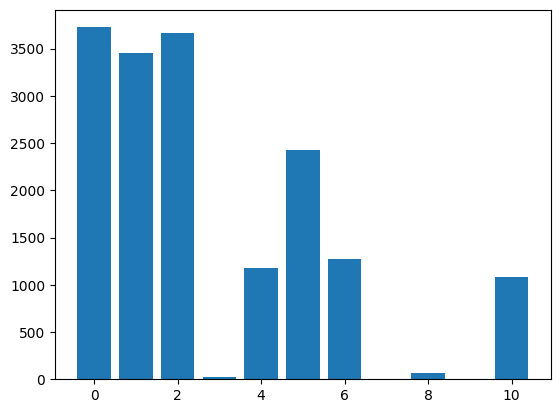

In [51]:
def select_features(x_train, y_train, x_test):
    features_to_select = SelectKBest(score_func=f_regression, k="all")
    features_to_select.fit(x_train, y_train)
    x_train_fs = features_to_select.transform(x_train)
    x_test_fs = features_to_select.transform(x_test)
    return x_train_fs, x_test_fs, features_to_select

x_train_fs, x_val_fs, features_to_select = select_features(x_train, y_train, x_val)

for i in range(len(features_to_select.scores_)):
    print('Feature %d: %f' % (i, features_to_select.scores_[i]))

pyplot.bar([i for i in range(len(features_to_select.scores_))], features_to_select.scores_)
pyplot.show()

By looking on the values and the plot from the function above, I selected the best features and split the data into training, validation and test data based on the best features. 

In [52]:
selected_features = ["Globalstraling", "Solskinstid", "Lufttemperatur", "Season", "Weekdays", "Weekends", "Hour"]

x_selected = clean_data.loc[:, selected_features]
y_selected = clean_data["Volum"]

x_train_s, x_val_and_test_s, y_train_s, y_val_and_test_s = train_test_split(x_selected, y_selected, test_size=0.3, shuffle=False)
x_val_s, x_test_s, y_val_s, y_test_s = train_test_split(x_val_and_test_s, y_val_and_test_s, test_size=0.5, shuffle=False)


### **Baseline model**

Then I made a baseline model using DummyRegressor and calculating RMSE.

In [53]:
baseline = DummyRegressor(strategy="mean")
baseline.fit(x_train, y_train)
prediction = baseline.predict(x_val)
print("RMSE:", (np.sqrt(mean_squared_error(y_val, prediction))))

RMSE: 65.10283875003901


### **Models**

Then I selected a few different models to test my data on, I saved them in a list to be able to use them further on.

In [54]:
models = [Lasso(), RandomForestRegressor(), KNeighborsRegressor(), ElasticNet(), HistGradientBoostingRegressor(), DecisionTreeRegressor(), MLPRegressor()]

I made to empty lists, to collect the different models with its respective RMSE.

In [55]:
trained_allfeatures = []
trained_selectedfeatures = []

I made a for loop to iterate through the different models. The first for loop is for the selected features.

In [56]:
for j in models:
    model = j

    model.fit(x_train_s, y_train_s)
    predict = np.rint(model.predict(x_val_s))

    mse = mean_squared_error(y_val_s, predict)
    rmse = np.sqrt(mse)

    print(model, "RMSE:", rmse)
    trained_selectedfeatures.append({"Model" : model, "RMSE" : rmse})

Lasso() RMSE: 63.07567416646103
RandomForestRegressor() RMSE: 39.2680488975862
KNeighborsRegressor() RMSE: 52.55865441745597
ElasticNet() RMSE: 63.089195829468935
HistGradientBoostingRegressor() RMSE: 37.81518134838765
DecisionTreeRegressor() RMSE: 49.61704968827013
MLPRegressor() RMSE: 50.46368233499497


c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Then I did the same as above, but now with all features represented.

In [57]:
for i in models:
    model = i

    model.fit(x_train, y_train)
    predict = np.rint(model.predict(x_val))

    mse = mean_squared_error(y_val, predict)
    rmse = np.sqrt(mse)

    print(model, "RMSE:", rmse)
    trained_allfeatures.append({"Model" : model, "RMSE" : rmse})


Lasso() RMSE: 55.992059996850834
RandomForestRegressor() RMSE: 27.500968404454152
KNeighborsRegressor() RMSE: 51.76579531346965
ElasticNet() RMSE: 55.99587125441294
HistGradientBoostingRegressor() RMSE: 28.749412693066684
DecisionTreeRegressor() RMSE: 38.18727111975169
MLPRegressor() RMSE: 44.00303628896965


c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


After calculating the RMSE for all the models, I found the model with the best RMSE. First, I did it for selected features.

In [58]:
min_rmse_selected = min([model["RMSE"] for model in trained_selectedfeatures])

for model in trained_selectedfeatures:
    if model["RMSE"] == min_rmse_selected:
        best_model_selected = model["Model"]

print(best_model_selected)

HistGradientBoostingRegressor()


Then I found the model with the best RMSE for all features.

In [59]:
min_rmse_all = min([model["RMSE"] for model in trained_allfeatures])

for model in trained_allfeatures:
    if model["RMSE"] == min_rmse_all:
        best_model_all = model["Model"]

print(best_model_all)

RandomForestRegressor()


The best model was RandomForestRegressor with all features, so I continued with that one to my test data. Which are shown below.

In [60]:
model_test = mean_squared_error(y_test, best_model_all.predict(x_test), squared=False)

print(best_model_all, "RMSE:", model_test)

RandomForestRegressor() RMSE: 33.67210786805623


Then I checked the weather and traffic data for 2022 for missing values.

In [61]:
weather_traffic_2022.isna().sum()

Datetime             0
Globalstraling      31
Solskinstid          0
Lufttemperatur      28
Vindstyrke          28
Volum             3554
Season               0
Weekdays             0
Weekends             0
dtype: int64

Since there are missing values for "Globalstraling", "Lufttemperatur" and "Vindstyrke", I replace the missing values with the mean value. 

I continued the cleaning of the weather and traffic for 2022 by separating the "Datetime" column into four separate columns, as I did earlier. 

Then I split the data in two, where one parameter consits of the volum and the other have the rest. I checked the rest for missing values to be sure that all missing values were gone. 

In [62]:
weather_traffic_2022["Lufttemperatur"].fillna((weather_traffic_2022["Lufttemperatur"].mean()), inplace=True)
weather_traffic_2022["Vindstyrke"].fillna((weather_traffic_2022["Vindstyrke"].mean()), inplace=True)
weather_traffic_2022["Globalstraling"].fillna((weather_traffic_2022["Globalstraling"].mean()), inplace=True)

separateDatetime(weather_traffic_2022)
weather_traffic_2022.drop(["Datetime"], axis=1, inplace=True)

volum_wf2022 = weather_traffic_2022["Volum"]
wf2022_rest = weather_traffic_2022.loc[:, weather_traffic_2022.columns != "Volum"]

wf2022_rest.isna().sum()


Globalstraling    0
Solskinstid       0
Lufttemperatur    0
Vindstyrke        0
Season            0
Weekdays          0
Weekends          0
Year              0
Month             0
Day               0
Hour              0
dtype: int64

Then I did the prediction on the rest that I made above, and saved the preidictions to a csv file. 

In [63]:
prediction_2022 = best_model_all.predict(wf2022_rest).clip(0) 
prediction_2022 = np.round(prediction_2022, 0)
prediction = pd.DataFrame(prediction_2022, columns=["Volum"])
prediction = prediction.reset_index().rename(columns={"index": "ID"})

prediction.to_csv("predictions.csv")

Ultimately, I used pickle.dump on the best model.

In [64]:
pickle.dump(best_model_all, open("model.pkl", "wb"))